Q1

Accuracy: 0.9120879120879121
Precision: 0.9224305106658047
Recall: 0.9120879120879121
F1-score: 0.9083231583231582


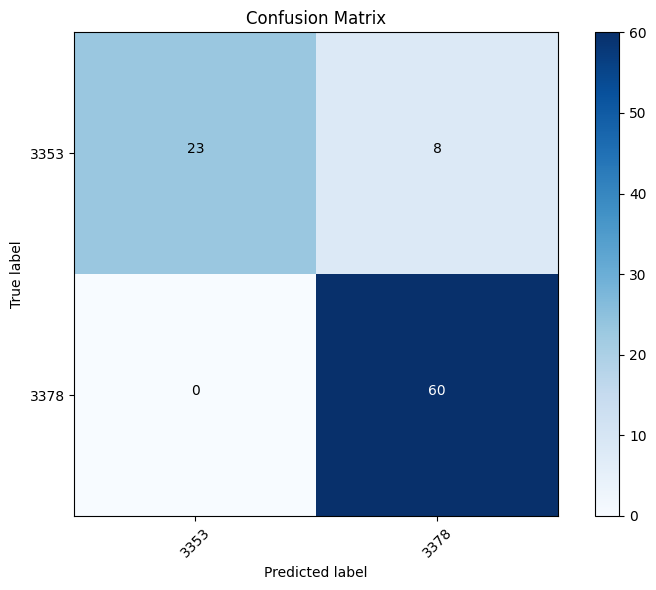

In [24]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

dataset_path = "C:\\Users\\mvy48\\OneDrive\\Desktop\\vscodeprograms\\ml_labsessions\\lab4\\DCT_malayalam_char 1.xlsx"
dataset = pd.read_excel(dataset_path)

features = dataset.iloc[:, :-1].values
labels = dataset.iloc[:, -1].values

class_label_1 = 3353
class_label_2 = 3378

class_1_indices = np.where(labels == class_label_1)[0]
class_2_indices = np.where(labels == class_label_2)[0]

selected_indices = np.concatenate((class_1_indices, class_2_indices))

selected_features = features[selected_indices]
selected_labels = labels[selected_indices]

X_train, X_test, y_train, y_test = train_test_split(selected_features, selected_labels, test_size=0.3, random_state=42)

neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(selected_labels)))
plt.xticks(tick_marks, np.unique(selected_labels), rotation=45)
plt.yticks(tick_marks, np.unique(selected_labels))
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

plt.show()


Q2

In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

file_path = r"C:\Users\mvy48\OneDrive\Desktop\vscodeprograms\ml_labsessions\Lab_Session1_Data.xlsx"
df = pd.read_excel(file_path, sheet_name="Purchase data")

print("First 5 Columns:", df.columns[:5])

actual_prices_column_name = 'Milk'
predicted_prices_column_name = 'Milk'

actual_prices = df[actual_prices_column_name].values
predicted_prices = df[predicted_prices_column_name].values

df_cleaned = df.dropna(subset=[actual_prices_column_name, predicted_prices_column_name])

actual_prices = df_cleaned[actual_prices_column_name].values
predicted_prices = df_cleaned[predicted_prices_column_name].values

print("Actual Values:", actual_prices)
print("Predicted Values:", predicted_prices)

mse = mean_squared_error(actual_prices, predicted_prices)

rmse = np.sqrt(mse)

mape = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100

if len(actual_prices) >= 2:
    r2 = r2_score(actual_prices, predicted_prices)
    print(f'R-squared (R2) score: {r2}')
else:
    print('Insufficient samples to calculate R-squared.')

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')


First 5 Columns: Index(['Customer', 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)',
       'Payment (Rs)'],
      dtype='object')
Actual Values: [18.]
Predicted Values: [18.]
Insufficient samples to calculate R-squared.
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Percentage Error (MAPE): 0.0


Q3

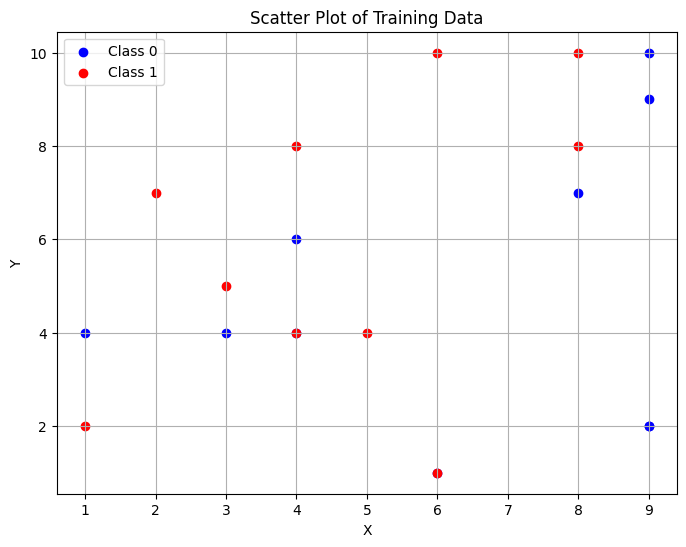

In [26]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  
X = np.random.randint(1, 11, size=(20, 2))

classes = np.random.randint(0, 2, size=20)

class0_points = X[classes == 0]
class1_points = X[classes == 1]

plt.figure(figsize=(8, 6))
plt.scatter(class0_points[:, 0], class0_points[:, 1], color='blue', label='Class 0')
plt.scatter(class1_points[:, 0], class1_points[:, 1], color='red', label='Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Training Data')
plt.legend()
plt.grid(True)
plt.show()


Q4

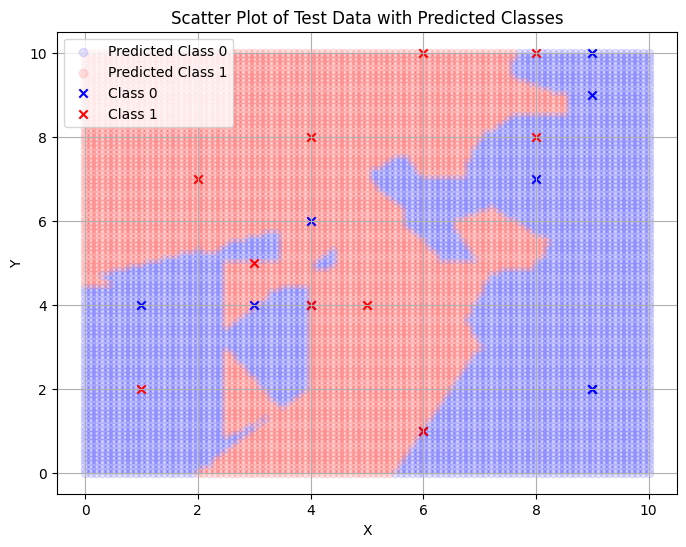

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
xx, yy = np.meshgrid(x_values, y_values)
test_data = np.c_[xx.ravel(), yy.ravel()]

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X, classes)

predicted_classes = knn.predict(test_data)

class0_test = test_data[predicted_classes == 0]
class1_test = test_data[predicted_classes == 1]

plt.figure(figsize=(8, 6))
plt.scatter(class0_test[:, 0], class0_test[:, 1], color='blue', alpha=0.1, label='Predicted Class 0')
plt.scatter(class1_test[:, 0], class1_test[:, 1], color='red', alpha=0.1, label='Predicted Class 1')
plt.scatter(class0_points[:, 0], class0_points[:, 1], color='blue', label='Class 0', marker='x')
plt.scatter(class1_points[:, 0], class1_points[:, 1], color='red', label='Class 1', marker='x')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Test Data with Predicted Classes')
plt.legend()
plt.grid(True)
plt.show()


Q5

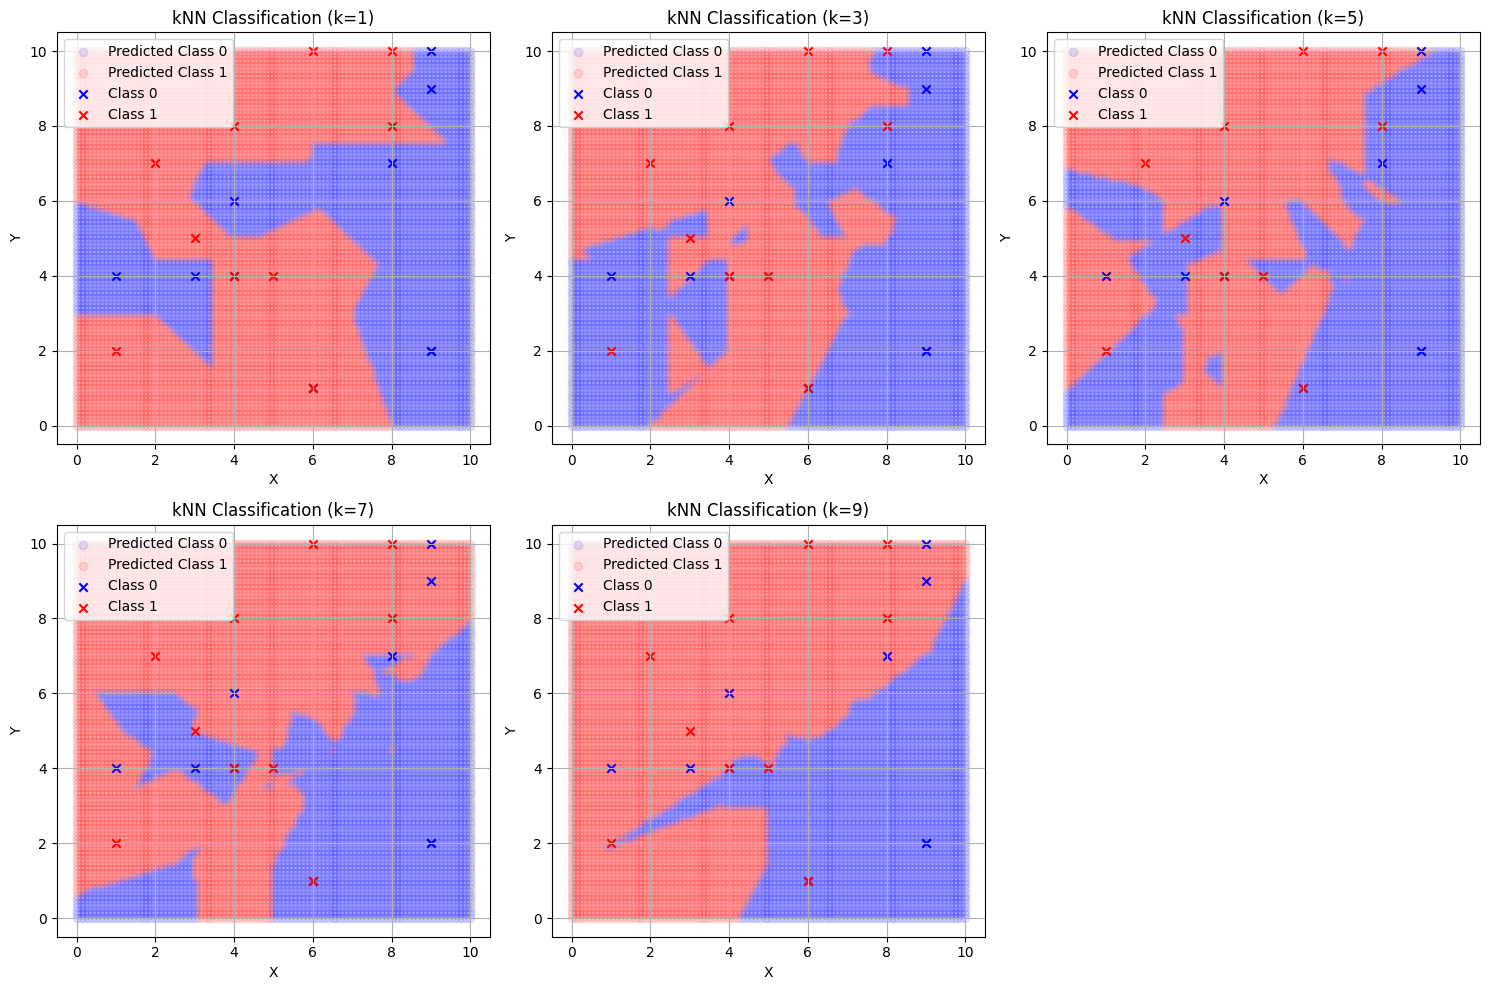

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
xx, yy = np.meshgrid(x_values, y_values)
test_data = np.c_[xx.ravel(), yy.ravel()]

k_values = [1, 3, 5, 7, 9]

plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values, start=1):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X, classes)
    
    predicted_classes = knn.predict(test_data)
    
    class0_test = test_data[predicted_classes == 0]
    class1_test = test_data[predicted_classes == 1]
    
    
    plt.subplot(2, 3, i)
    plt.scatter(class0_test[:, 0], class0_test[:, 1], color='blue', alpha=0.1, label='Predicted Class 0')
    plt.scatter(class1_test[:, 0], class1_test[:, 1], color='red', alpha=0.1, label='Predicted Class 1')
    plt.scatter(class0_points[:, 0], class0_points[:, 1], color='blue', label='Class 0', marker='x')
    plt.scatter(class1_points[:, 0], class1_points[:, 1], color='red', label='Class 1', marker='x')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'kNN Classification (k={k})')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


A6)a3

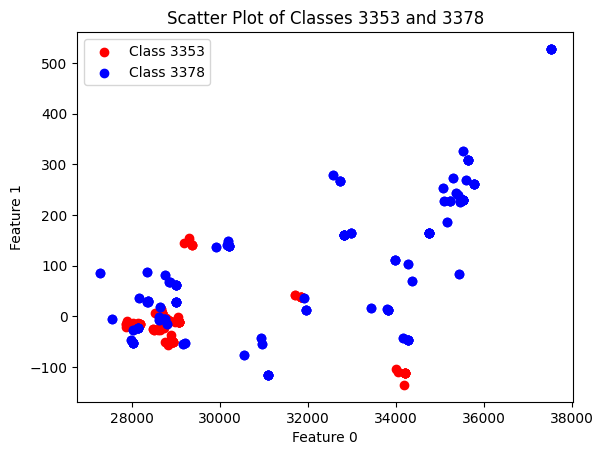

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "C:\\Users\\mvy48\\OneDrive\\Desktop\\vscodeprograms\\ml_labsessions\\lab4\\DCT_malayalam_char 1.xlsx"
df = pd.read_excel(file_path)

class_3353 = df[df['LABEL'] == 3353]
class_3378 = df[df['LABEL'] == 3378]

plt.scatter(class_3353[0], class_3353[1], color='red', label='Class 3353')
plt.scatter(class_3378[0], class_3378[1], color='blue', label='Class 3378')

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Scatter Plot of Classes 3353 and 3378')

plt.legend()
plt.show()


A6)a4

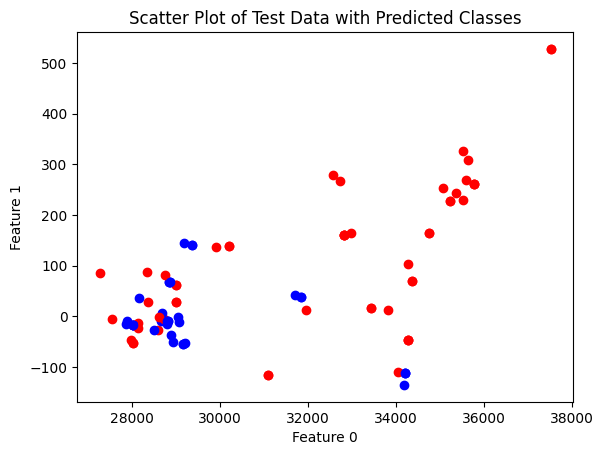

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

file_path = "C:\\Users\\mvy48\\OneDrive\\Desktop\\vscodeprograms\\ml_labsessions\\lab4\\DCT_malayalam_char 1.xlsx"
df = pd.read_excel(file_path)

filtered_df = df[df['LABEL'].isin([3353, 3378])]
X = filtered_df[[0, 1]].values
y = filtered_df['LABEL'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train, y_train)

predicted_classes = knn_classifier.predict(X_test)

for i, class_label in enumerate(predicted_classes):
    if class_label == 3353:
        plt.scatter(X_test[i, 0], X_test[i, 1], color='blue', label='Predicted Class 3353')
    elif class_label == 3378:
        plt.scatter(X_test[i, 0], X_test[i, 1], color='red', label='Predicted Class 3378')

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Scatter Plot of Test Data with Predicted Classes')

plt.show()

A6)a5

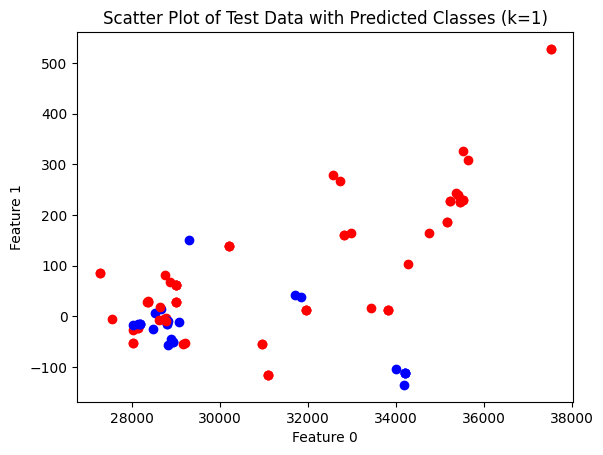

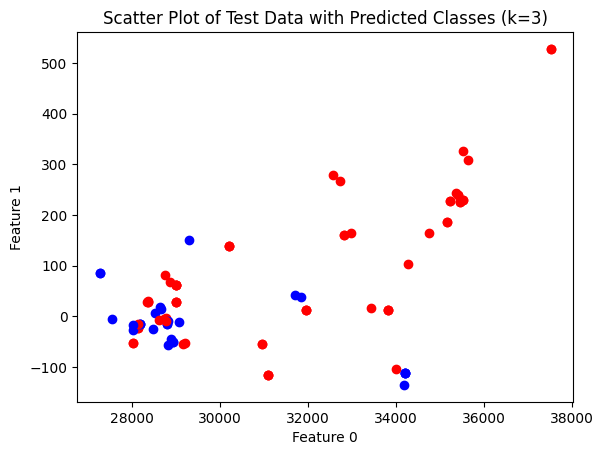

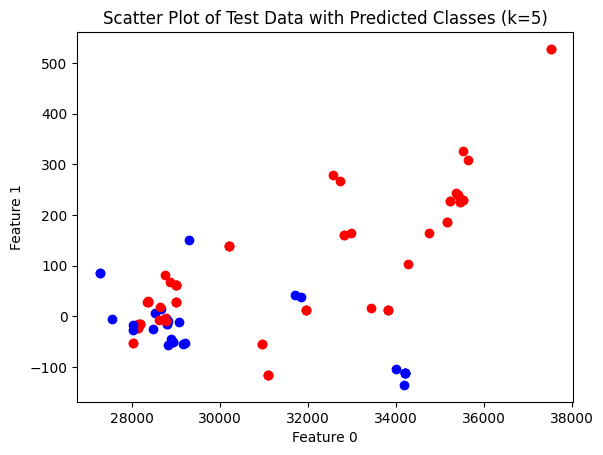

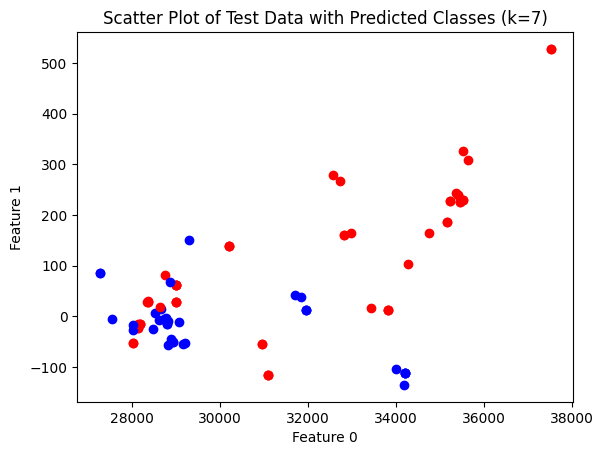

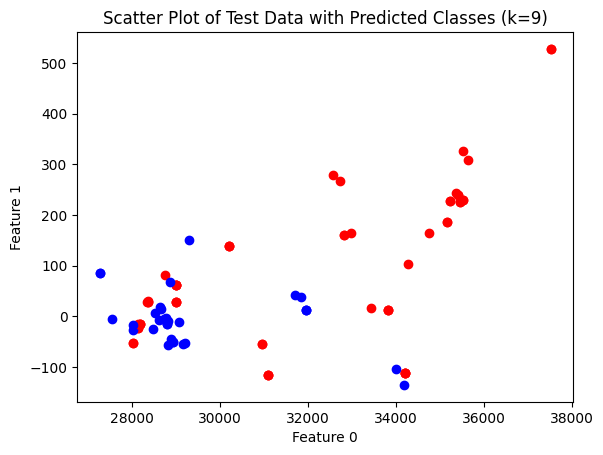

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

file_path = "C:\\Users\\mvy48\\OneDrive\\Desktop\\vscodeprograms\\ml_labsessions\\lab4\\DCT_malayalam_char 1.xlsx"
df = pd.read_excel(file_path)

filtered_df = df[df['LABEL'].isin([3353, 3378])]
X = filtered_df[[0, 1]].values
y = filtered_df['LABEL'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    # Predict the classes for test data
    predicted_classes = knn_classifier.predict(X_test)

    # Plot the test points with predicted classes
    for i, class_label in enumerate(predicted_classes):
        if class_label == 3353:
            plt.scatter(X_test[i, 0], X_test[i, 1], color='blue', label='Predicted Class 3353')
        elif class_label == 3378:
            plt.scatter(X_test[i, 0], X_test[i, 1], color='red', label='Predicted Class 3378')

    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.title(f'Scatter Plot of Test Data with Predicted Classes (k={k})')
    plt.show()


A7

Best parameters: {'n_neighbors': 1}


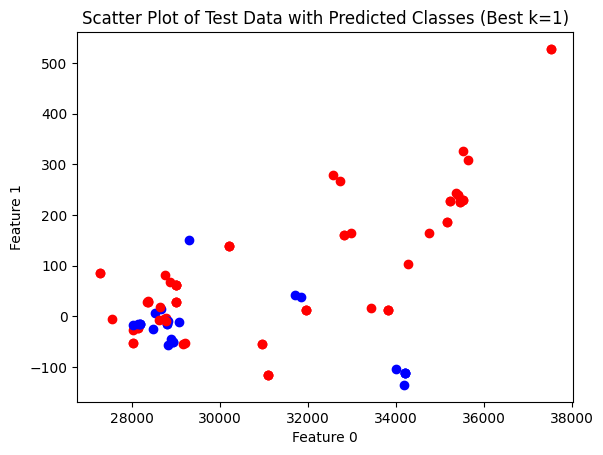

In [32]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# Initialize kNN classifier
knn_classifier = KNeighborsClassifier()

grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_knn_classifier = grid_search.best_estimator_

predicted_classes = best_knn_classifier.predict(X_test)

for i, class_label in enumerate(predicted_classes):
    if class_label == 3353:
        plt.scatter(X_test[i, 0], X_test[i, 1], color='blue', label='Predicted Class 3353')
    elif class_label == 3378:
        plt.scatter(X_test[i, 0], X_test[i, 1], color='red', label='Predicted Class 3378')

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title(f'Scatter Plot of Test Data with Predicted Classes (Best k={grid_search.best_params_["n_neighbors"]})')

plt.show()
